Below webpage is the general purpose open data portal for the State of Washington.<br>
We downloaded and used csv files from this portal for our analysis practice project.<br>
아래 웹페이지는 워싱턴 주 공공오픈데이터포털입니다. 저희는 여기에서 csv 파일을 받아 분석 실습을 하였습니다.
<br><br>
https://data.wa.gov
<br><br><br><br>

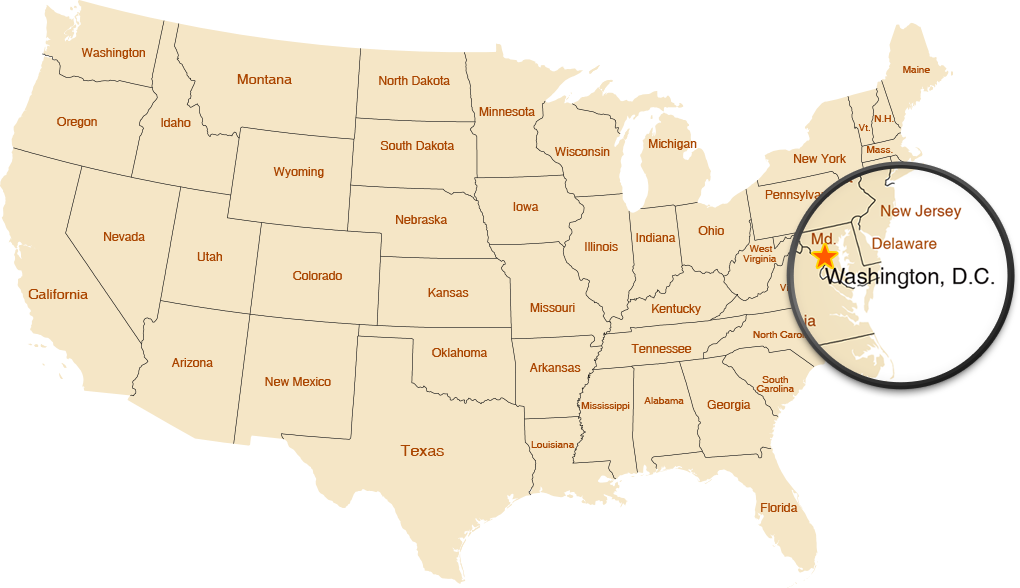

Washington 과 Washington, D.C. 는 다른지역입니다
<br><br>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
electric = pd.read_csv('/Users/isc-yeon/Documents/projectData/Electric_Vehicle_Population_Data.csv')

electric.head()

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility
0,1G1RC6E45F,Thurston,TENINO,WA,98589,2015,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,35.0,157715015,POINT (-122.842388 46.855401),PUGET SOUND ENERGY INC
1,5YJSA1E26J,Snohomish,MUKILTEO,WA,98275,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,21.0,474398907,POINT (-122.302507 47.911921),PUGET SOUND ENERGY INC
2,5YJSA1E26K,Camden,SAINT MARYS,GA,31558,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,NaN,185220493,POINT (-81.558651 30.777128),NaN
3,1G1FW6S03H,Thurston,LACEY,WA,98503,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,22.0,196814537,POINT (-122.80237 47.02499),PUGET SOUND ENERGY INC
4,1N4AZ0CP6D,Skagit,MOUNT VERNON,WA,98273,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,40.0,171974470,POINT (-122.355669 48.416422),PUGET SOUND ENERGY INC


<br><br>
<h2>각 컬럼이 무슨 의미인지!</h2>

<ui>
    <li>VIN (1-10) 차대번호(첫 10자리만)</li>
    <li>County 등록차량의 소유자가 거주하는 군</li>
    <li>City 등록차량의 소유자가 거주하는 시</li>
    <li>State 등록차량의 소유자가 거주하는 주 (State > County > City)</li>
    <li>ZIP Code 우편번호</li>
    <li>Model Year 차량 모델 연도</li>
    <li>Make 제조사</li>
    <li>Model 모델명</li>
    <li>Electric Vehicle Type 하이브리드 or 100%전기차</li>
    <li>Clean Alternative Fuel Vehicle (CAFV) Eligibility (2019년 입법 세션에서 통과된 하원 법안 2024의 요구사항에 따른) 청정 대체 연료 차량 여부</li>
    <li>Electric Range 완충 후 이동 가능한 거리</li>
    <li>Base MSRP 제조업체 권장 소매 가격</li>
    <li>Legislative District 차량 소유자가 거주하는 워싱턴주 특정구역(이건 진짜 모르겠음 행정구역을 나눈건데 선거구식으로 나눈거를 번호 매긴거 같은데 걍 모르겠음)</li>
    <li>DOL Vehicle ID 주 면허부서에서 부여한 차량 Id</li>
    <li>Vehicle Location 차량 위치(등록된 우편번호의 지리상 가운데 지점을 좌표로 표시)</li>
    <li>Electric Utility 전력 공급원(확실하지는 않은데.. 전기차 충전할때 그 충전기가 회사가 다 다른거 같음 주유소도 에스오일, gs칼텍스, sk 여러개 있는 것처럼 그 회사가 어떤건지 차량 등록주소 근처 충전소 중 제일 가까운 데 브랜드를 넣은거 같음)</li>
</ui>
<br><br>

In [3]:
electric.columns #각 컬럼의 값을 표시해보는 중

Index(['VIN (1-10)', 'County', 'City', 'State', 'ZIP Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility'],
      dtype='object')

In [4]:
electric.dtypes #.dtypes속성을 사용하면 각 열의 이름과 데이터 형식을 나란히 표시할 수 있음.

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
ZIP Code                                               int64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
dtype: object

In [5]:
electric.dtypes.value_counts() #.value_counts메서드를 사용하면 각 데이터 형식의 개수를 반환함.

object     10
int64       5
float64     1
dtype: int64

In [6]:
electric.info() #.info메서드를 사용하면 null값이 아닌 값의 개수와 함께 데이터 형식 정보를 출력한다

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91933 entries, 0 to 91932
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         91933 non-null  object 
 1   County                                             91925 non-null  object 
 2   City                                               91933 non-null  object 
 3   State                                              91933 non-null  object 
 4   ZIP Code                                           91933 non-null  int64  
 5   Model Year                                         91933 non-null  int64  
 6   Make                                               91933 non-null  object 
 7   Model                                              91916 non-null  object 
 8   Electric Vehicle Type                              91933 non-null  object 
 9   Clean 

In [7]:
pd.Series(["Paul", np.nan, "George"]).dtype # dtypes속성을 사용해 pandas Series로 반환가능

dtype('O')

In [8]:
pd.Series([1, np.nan, 3]).dtype # dtypes속성을 사용해 pandas Series로 반환가능

dtype('float64')

In [9]:
electric.loc[:, "Make"] # 컬럼(Make)이름을 정확하게 명시할 때

0        CHEVROLET
1            TESLA
2            TESLA
3        CHEVROLET
4           NISSAN
           ...    
91928          BMW
91929        TESLA
91930        TESLA
91931        TESLA
91932    CHEVROLET
Name: Make, Length: 91933, dtype: object

In [10]:
electric.iloc[:, 1] # 컬럼 이름 대신 번호

0         Thurston
1        Snohomish
2           Camden
3         Thurston
4           Skagit
           ...    
91928       Pierce
91929    Snohomish
91930    Snohomish
91931         King
91932         King
Name: County, Length: 91933, dtype: object

In [11]:
#Series의 인덱스, 형식, 길이, 이름도 같이 볼 수 있음(Make컬럼을 사용)
electric["Make"].index

RangeIndex(start=0, stop=91933, step=1)

In [12]:
electric["Make"].dtype

dtype('O')

In [13]:
electric["Make"].size

91933

In [14]:
electric.iloc[:, 6].name

'Make'

In [15]:
#출력이 Series가 맞는지 확인해보면
type(electric["Make"])

pandas.core.series.Series

<br><b>이번엔 unique() 메서드</b><br><br>

In [16]:
electric["Make"].unique()

array(['CHEVROLET', 'TESLA', 'NISSAN', 'TOYOTA', 'VOLKSWAGEN', 'FORD',
       'BMW', 'AUDI', 'KIA', 'FIAT', 'JEEP', 'SMART', 'HYUNDAI',
       'CHRYSLER', 'PORSCHE', 'MITSUBISHI', 'VOLVO', 'LAND ROVER',
       'HONDA', 'JAGUAR', 'MERCEDES-BENZ', 'POLESTAR', 'LINCOLN',
       'CADILLAC', 'SUBARU', 'MINI', 'RIVIAN', 'WHEEGO ELECTRIC CARS',
       'TH!NK', 'FISKER', 'DODGE', 'AZURE DYNAMICS', 'LUCID MOTORS',
       'BENTLEY'], dtype=object)

In [17]:
electric["Make"].apply(type)

0        <class 'str'>
1        <class 'str'>
2        <class 'str'>
3        <class 'str'>
4        <class 'str'>
             ...      
91928    <class 'str'>
91929    <class 'str'>
91930    <class 'str'>
91931    <class 'str'>
91932    <class 'str'>
Name: Make, Length: 91933, dtype: object

In [18]:
electric["Make"].apply(type).unique()

array([<class 'str'>], dtype=object)

In [19]:
pd.Series(["Paul", np.nan, "George"]).apply(type)

0      <class 'str'>
1    <class 'float'>
2      <class 'str'>
dtype: object

In [20]:
pd.Series(["Paul", np.nan, "George"]).apply(type).unique()

array([<class 'str'>, <class 'float'>], dtype=object)

In [21]:
#csv용량 줄이기를 할껀데 전체 파일이 차지할 메모리를 알아보자. read_csv의 nrows매개변수를 사용하면 읽을 데이터를 작은 표본으로 제안할 수 있다.
electric = pd.read_csv("/Users/isc-yeon/Documents/projectData/Electric_Vehicle_Population_Data.csv",
                       #nrows=1000
                      )
electric

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility
0,1G1RC6E45F,Thurston,TENINO,WA,98589,2015,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,35.0,157715015,POINT (-122.842388 46.855401),PUGET SOUND ENERGY INC
1,5YJSA1E26J,Snohomish,MUKILTEO,WA,98275,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,21.0,474398907,POINT (-122.302507 47.911921),PUGET SOUND ENERGY INC
2,5YJSA1E26K,Camden,SAINT MARYS,GA,31558,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,NaN,185220493,POINT (-81.558651 30.777128),NaN
3,1G1FW6S03H,Thurston,LACEY,WA,98503,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,22.0,196814537,POINT (-122.80237 47.02499),PUGET SOUND ENERGY INC
4,1N4AZ0CP6D,Skagit,MOUNT VERNON,WA,98273,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,40.0,171974470,POINT (-122.355669 48.416422),PUGET SOUND ENERGY INC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91928,5UXKT0C37H,Pierce,GIG HARBOR,WA,98332,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,26.0,131262967,POINT (-122.599454 47.36582),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
91929,5YJ3E1EB6K,Snohomish,BOTHELL,WA,98012,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,1.0,477662762,POINT (-122.201515 47.843376),PUGET SOUND ENERGY INC
91930,5YJ3E1EB2J,Snohomish,LAKE STEVENS,WA,98258,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,44.0,209736698,POINT (-122.085999 48.016305),PUGET SOUND ENERGY INC
91931,5YJ3E1EA1K,King,FEDERAL WAY,WA,98023,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,30.0,478128010,POINT (-122.362029 47.308531),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [22]:
# .info메서드를 시용해 데이터 표본이 사용하고 있는 메모리 용량을 살펴보자.
electric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91933 entries, 0 to 91932
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         91933 non-null  object 
 1   County                                             91925 non-null  object 
 2   City                                               91933 non-null  object 
 3   State                                              91933 non-null  object 
 4   ZIP Code                                           91933 non-null  int64  
 5   Model Year                                         91933 non-null  int64  
 6   Make                                               91933 non-null  object 
 7   Model                                              91916 non-null  object 
 8   Electric Vehicle Type                              91933 non-null  object 
 9   Clean 

<b>위에 내용을 해석해보면 91933개의 행이 11.2 MB의 메모리를 사용하고 있다는 의미.<b>

Type      Capacity

Int16 -- (-32,768 to +32,767)

Int32 -- (-2,147,483,648 to +2,147,483,647)

Int64 -- (-9,223,372,036,854,775,808 to +9,223,372,036,854,775,807)

In [23]:
np.iinfo(np.int16)

iinfo(min=-32768, max=32767, dtype=int16)

In [24]:
np.iinfo(np.int32)

iinfo(min=-2147483648, max=2147483647, dtype=int32)

In [25]:
np.iinfo(np.int64)

iinfo(min=-9223372036854775808, max=9223372036854775807, dtype=int64)

In [26]:
electric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91933 entries, 0 to 91932
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         91933 non-null  object 
 1   County                                             91925 non-null  object 
 2   City                                               91933 non-null  object 
 3   State                                              91933 non-null  object 
 4   ZIP Code                                           91933 non-null  int64  
 5   Model Year                                         91933 non-null  int64  
 6   Make                                               91933 non-null  object 
 7   Model                                              91916 non-null  object 
 8   Electric Vehicle Type                              91933 non-null  object 
 9   Clean 

In [27]:
electric.loc[:,'Vehicle Location'].apply(type).unique()

array([<class 'str'>, <class 'float'>], dtype=object)

In [28]:
electric.loc[:,'Vehicle Location'].isnull().sum()


763

In [29]:
763 + 91170
# float형식으로 들어가있는 값들은 다 NA 인거 같음

91933

In [30]:
#read_csv에 dtype 매개변수를 사용해 정확한 수치 형식을 사용하도록 지정해보자.
electric2 = pd.read_csv(
    "/Users/isc-yeon/Documents/projectData/Electric_Vehicle_Population_Data.csv",
    #nrows=1000,
    dtype={
        "ZIP Code":np.int32,
        "Model Year":np.int16,
        "Electric Range":np.int16,
        "Base MSRP":np.int16,
        "Legislative District":np.float64, #na값이 있음.
        "DOL Vehicle ID":np.int32,
        #"vehicle Location":"object"
        #vehicle Location은 float인지 문자인지 모르겠음
    },
)
######여기서 타입도 어떤걸 int16인지 float32인지 등등 모르겟음###########

In [31]:
electric2

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility
0,1G1RC6E45F,Thurston,TENINO,WA,98589,2015,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,35.0,157715015,POINT (-122.842388 46.855401),PUGET SOUND ENERGY INC
1,5YJSA1E26J,Snohomish,MUKILTEO,WA,98275,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,21.0,474398907,POINT (-122.302507 47.911921),PUGET SOUND ENERGY INC
2,5YJSA1E26K,Camden,SAINT MARYS,GA,31558,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,NaN,185220493,POINT (-81.558651 30.777128),NaN
3,1G1FW6S03H,Thurston,LACEY,WA,98503,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,22.0,196814537,POINT (-122.80237 47.02499),PUGET SOUND ENERGY INC
4,1N4AZ0CP6D,Skagit,MOUNT VERNON,WA,98273,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,40.0,171974470,POINT (-122.355669 48.416422),PUGET SOUND ENERGY INC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91928,5UXKT0C37H,Pierce,GIG HARBOR,WA,98332,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,26.0,131262967,POINT (-122.599454 47.36582),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...
91929,5YJ3E1EB6K,Snohomish,BOTHELL,WA,98012,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,1.0,477662762,POINT (-122.201515 47.843376),PUGET SOUND ENERGY INC
91930,5YJ3E1EB2J,Snohomish,LAKE STEVENS,WA,98258,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,44.0,209736698,POINT (-122.085999 48.016305),PUGET SOUND ENERGY INC
91931,5YJ3E1EA1K,King,FEDERAL WAY,WA,98023,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,30.0,478128010,POINT (-122.362029 47.308531),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA)


In [32]:
electric2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91933 entries, 0 to 91932
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         91933 non-null  object 
 1   County                                             91925 non-null  object 
 2   City                                               91933 non-null  object 
 3   State                                              91933 non-null  object 
 4   ZIP Code                                           91933 non-null  int32  
 5   Model Year                                         91933 non-null  int16  
 6   Make                                               91933 non-null  object 
 7   Model                                              91916 non-null  object 
 8   Electric Vehicle Type                              91933 non-null  object 
 9   Clean 

<b>메모리 사용 11.2 MB --->  8.9 MB<b>

In [33]:
#새 데이터와 요약 통계량이 원시 데이터와 유사한지 확인해보자.
electric.describe()

,ZIP Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID
count,91933.00000,91933.000000,91933.000000,91933.000000,91694.000000,9.193300e+04
mean,98143.71266,2018.184515,106.913774,2516.637606,29.943988,1.973953e+08
std,2837.68650,2.724119,104.047660,12251.344914,14.654830,1.071776e+08
min,745.00000,1993.000000,0.000000,0.000000,0.000000,4.385000e+03
25%,98052.00000,2017.000000,14.000000,0.000000,19.000000,1.372025e+08
50%,98119.00000,2018.000000,73.000000,0.000000,34.000000,1.754096e+08
75%,98370.00000,2021.000000,215.000000,0.000000,43.000000,2.299994e+08
max,99701.00000,2022.000000,337.000000,845000.000000,49.000000,4.792548e+08


In [34]:
electric2.describe()

,ZIP Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID
count,91933.00000,91933.000000,91933.000000,91933.000000,91694.000000,9.193300e+04
mean,98143.71266,2018.184515,106.913774,-120.970217,29.943988,1.973953e+08
std,2837.68650,2.724119,104.047660,4644.644259,14.654830,1.071776e+08
min,745.00000,1993.000000,0.000000,-32541.000000,0.000000,4.385000e+03
25%,98052.00000,2017.000000,14.000000,0.000000,19.000000,1.372025e+08
50%,98119.00000,2018.000000,73.000000,0.000000,34.000000,1.754096e+08
75%,98370.00000,2021.000000,215.000000,0.000000,43.000000,2.299994e+08
max,99701.00000,2022.000000,337.000000,32250.000000,49.000000,4.792548e+08


어떻게 보는지 잘 모르겠음.. 그냥 1000으로 제한을 잡아놨어서 그것만 다른거 아닌가? ...???

In [35]:
#메모리를 가장 쉽게 줄이는 방법은 dtype를 변경하는 것!! 그걸로 해보자
#dtype 매개변수를 사용해 객체 형식을 범주형으로 변경하면 각 object열의 .value_counts메서드를 살펴보자.(개수가 몇개 없으면 범주형으로 변경해서 메모리를 더 절약할 수 있다.)

electric2.County.value_counts()

King           47918
Snohomish       9878
Pierce          6965
Clark           5314
Thurston        3450
               ...  
Moore              1
Mecklenburg        1
Palm Beach         1
Lake               1
Duval              1
Name: County, Length: 162, dtype: int64

In [36]:
electric2.County

0         Thurston
1        Snohomish
2           Camden
3         Thurston
4           Skagit
           ...    
91928       Pierce
91929    Snohomish
91930    Snohomish
91931         King
91932         King
Name: County, Length: 91933, dtype: object

In [37]:
electric2.City.value_counts()

SEATTLE         17136
BELLEVUE         4801
REDMOND          3468
VANCOUVER        3250
KIRKLAND         2924
                ...  
CAMARILLO           1
KITTITAS            1
SECAUCUS            1
SKYKOMISH           1
JACKSONVILLE        1
Name: City, Length: 614, dtype: int64

In [38]:
electric2.State.value_counts()

WA    91686
CA       54
VA       33
MD       30
TX       14
OR        8
NC        7
GA        7
NV        7
FL        7
AP        6
NE        4
MO        4
PA        4
DC        4
IL        4
HI        4
NJ        3
TN        3
IN        3
CT        3
NY        3
MT        2
AE        2
AZ        2
UT        2
DE        2
LA        2
NM        2
CO        2
MA        2
MS        2
KS        2
AK        2
ND        1
MN        1
OH        1
KY        1
PR        1
RI        1
WI        1
NH        1
AL        1
SD        1
WY        1
Name: State, dtype: int64

In [39]:
electric2.Make.value_counts()

TESLA                   39791
NISSAN                  12436
CHEVROLET                9492
FORD                     5535
KIA                      4327
BMW                      3847
TOYOTA                   3817
AUDI                     1830
VOLKSWAGEN               1760
CHRYSLER                 1600
HYUNDAI                  1275
VOLVO                    1033
FIAT                      792
HONDA                     764
PORSCHE                   656
JEEP                      615
MITSUBISHI                541
MINI                      441
MERCEDES-BENZ             352
SMART                     275
POLESTAR                  222
JAGUAR                    201
CADILLAC                   95
LINCOLN                    83
SUBARU                     50
RIVIAN                     37
LAND ROVER                 36
FISKER                     13
AZURE DYNAMICS              7
WHEEGO ELECTRIC CARS        3
TH!NK                       2
LUCID MOTORS                2
BENTLEY                     2
DODGE     

In [40]:
electric2.Model.value_counts()

MODEL 3                 18870
LEAF                    12436
MODEL Y                 10733
MODEL S                  6737
VOLT                     4921
                        ...  
BENTAYGA                    2
918 SPYDER                  1
PRIUS PLUG-IN HYBRID        1
XC90 AWD PHEV               1
CARAVAN                     1
Name: Model, Length: 106, dtype: int64

In [41]:
electric2.loc[:, "Electric Vehicle Type"].value_counts()

Battery Electric Vehicle (BEV)            68297
Plug-in Hybrid Electric Vehicle (PHEV)    23636
Name: Electric Vehicle Type, dtype: int64

In [42]:
electric2.loc[:, "Clean Alternative Fuel Vehicle (CAFV) Eligibility"].value_counts()

Clean Alternative Fuel Vehicle Eligible                         57108
Eligibility unknown as battery range has not been researched    21269
Not eligible due to low battery range                           13556
Name: Clean Alternative Fuel Vehicle (CAFV) Eligibility, dtype: int64

In [43]:
# dtype을 범주형으로 변경해서 메모리를 더 줄여보자
electric3 = pd.read_csv(
    "/Users/isc-yeon/Documents/projectData/Electric_Vehicle_Population_Data.csv",
    #nrows=1000,
    dtype={
        #"VIN (1-10)":"object",
        "County":"category",
        "City":"category",
        "State":"category",
        "ZIP Code":np.int32,
        "Model Year":np.int16,
        "Make":"category",
        "Model":"category",
        "Electric Vehicle Type":"object",
        "Clean Alternative Fuel Vehicle (CAFV) Eligibility":"object",
        "Electric Range":np.int16,
        "Base MSRP":np.int16,
        "Legislative District":np.float32,
        "DOL Vehicle ID":np.int32,
        #"Vehicle Location":"object",
        #"Electric Utility":"object",
    },
)

In [44]:
electric3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91933 entries, 0 to 91932
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype   
---  ------                                             --------------  -----   
 0   VIN (1-10)                                         91933 non-null  object  
 1   County                                             91925 non-null  category
 2   City                                               91933 non-null  category
 3   State                                              91933 non-null  category
 4   ZIP Code                                           91933 non-null  int32   
 5   Model Year                                         91933 non-null  int16   
 6   Make                                               91933 non-null  category
 7   Model                                              91916 non-null  category
 8   Electric Vehicle Type                              91933 non-null  object  


<b>메모리 사용 11.2 MB --->  8.9 MB ---> 5.7 MB<b>

In [45]:
# 오브젝트 타입 -> 카테고리 타입으로 바꾸기 전에 각 row가 9만개라 치면 중복되는 걸 확인 해 보자

In [46]:
electric4 = pd.read_csv('/Users/isc-yeon/Documents/projectData/Electric_Vehicle_Population_Data.csv')

electric4.head()

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility
0,1G1RC6E45F,Thurston,TENINO,WA,98589,2015,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,35.0,157715015,POINT (-122.842388 46.855401),PUGET SOUND ENERGY INC
1,5YJSA1E26J,Snohomish,MUKILTEO,WA,98275,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,21.0,474398907,POINT (-122.302507 47.911921),PUGET SOUND ENERGY INC
2,5YJSA1E26K,Camden,SAINT MARYS,GA,31558,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,NaN,185220493,POINT (-81.558651 30.777128),NaN
3,1G1FW6S03H,Thurston,LACEY,WA,98503,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,22.0,196814537,POINT (-122.80237 47.02499),PUGET SOUND ENERGY INC
4,1N4AZ0CP6D,Skagit,MOUNT VERNON,WA,98273,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,40.0,171974470,POINT (-122.355669 48.416422),PUGET SOUND ENERGY INC


In [47]:
electric4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91933 entries, 0 to 91932
Data columns (total 16 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   VIN (1-10)                                         91933 non-null  object 
 1   County                                             91925 non-null  object 
 2   City                                               91933 non-null  object 
 3   State                                              91933 non-null  object 
 4   ZIP Code                                           91933 non-null  int64  
 5   Model Year                                         91933 non-null  int64  
 6   Make                                               91933 non-null  object 
 7   Model                                              91916 non-null  object 
 8   Electric Vehicle Type                              91933 non-null  object 
 9   Clean 

In [48]:
electric4.describe(include='O').T

,count,unique,top,freq
VIN (1-10),91933,6062,5YJYGDEE0M,460
County,91925,162,King,47918
City,91933,614,SEATTLE,17136
State,91933,45,WA,91686
Make,91933,34,TESLA,39791
Model,91916,106,MODEL 3,18870
Electric Vehicle Type,91933,2,Battery Electric Vehicle (BEV),68297
Clean Alternative Fuel Vehicle (CAFV) Eligibility,91933,3,Clean Alternative Fuel Vehicle Eligible,57108
Vehicle Location,91170,748,POINT (-122.122018 47.678465),2432
Electric Utility,90884,69,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),32125


In [49]:
electric4.State.value_counts()
# 워싱턴 주(WA)가 거의 대부분임 - 당연한게 해당 csv 파일을 워싱턴주 데이터 포털 사이트에서 받은거임
# 다른주가 조금 섞여있는것은 워싱턴 주 안에 있는 차량이지만 소재지 or 등록지가 다른 주 인듯?

WA    91686
CA       54
VA       33
MD       30
TX       14
OR        8
NC        7
GA        7
NV        7
FL        7
AP        6
NE        4
MO        4
PA        4
DC        4
IL        4
HI        4
NJ        3
TN        3
IN        3
CT        3
NY        3
MT        2
AE        2
AZ        2
UT        2
DE        2
LA        2
NM        2
CO        2
MA        2
MS        2
KS        2
AK        2
ND        1
MN        1
OH        1
KY        1
PR        1
RI        1
WI        1
NH        1
AL        1
SD        1
WY        1
Name: State, dtype: int64

In [50]:
electric4.describe(include='O').T
# VIN (1-10) 컬럼은 차량 고유번호를 의미하는것 같은데 unique 값이 6062개인건 조금 이상함 - 같은차량이 중복되어 있는것인지..
# 차량번호 앞에 10자리만 표현한거라 중복값이 많은것임.. 각각을 개별 차량으로 이해해도 무방할것 같음

,count,unique,top,freq
VIN (1-10),91933,6062,5YJYGDEE0M,460
County,91925,162,King,47918
City,91933,614,SEATTLE,17136
State,91933,45,WA,91686
Make,91933,34,TESLA,39791
Model,91916,106,MODEL 3,18870
Electric Vehicle Type,91933,2,Battery Electric Vehicle (BEV),68297
Clean Alternative Fuel Vehicle (CAFV) Eligibility,91933,3,Clean Alternative Fuel Vehicle Eligible,57108
Vehicle Location,91170,748,POINT (-122.122018 47.678465),2432
Electric Utility,90884,69,PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),32125


In [51]:
electric4.loc[:, "Model Year"].unique()

array([2015, 2018, 2019, 2017, 2013, 2020, 2012, 2021, 2016, 2014, 2011,
       2022, 2008, 2010, 2002, 2000, 1998, 1993, 1999])

In [52]:
electric4.describe().T

,count,mean,std,min,25%,50%,75%,max
ZIP Code,91933.0,9.814371e+04,2.837687e+03,745.0,98052.0,98119.0,98370.0,99701.0
Model Year,91933.0,2.018185e+03,2.724119e+00,1993.0,2017.0,2018.0,2021.0,2022.0
Electric Range,91933.0,1.069138e+02,1.040477e+02,0.0,14.0,73.0,215.0,337.0
Base MSRP,91933.0,2.516638e+03,1.225134e+04,0.0,0.0,0.0,0.0,845000.0
Legislative District,91694.0,2.994399e+01,1.465483e+01,0.0,19.0,34.0,43.0,49.0
DOL Vehicle ID,91933.0,1.973953e+08,1.071776e+08,4385.0,137202460.0,175409573.0,229999374.0,479254772.0


In [53]:
electric4.loc[:, "Model Year"].isnull().sum()
# NA 필드 없음

0

In [54]:
electric4.loc[:, "Model Year"].value_counts()
# electric.loc[:, "Model Year"].value_counts().index

2021    18734
2018    14035
2020    10777
2019    10552
2017     9723
2016     6313
2022     5562
2015     5007
2013     4799
2014     3778
2012     1723
2011      867
2008       24
2010       24
2000        9
2002        2
1999        2
1998        1
1993        1
Name: Model Year, dtype: int64

<BarContainer object of 19 artists>

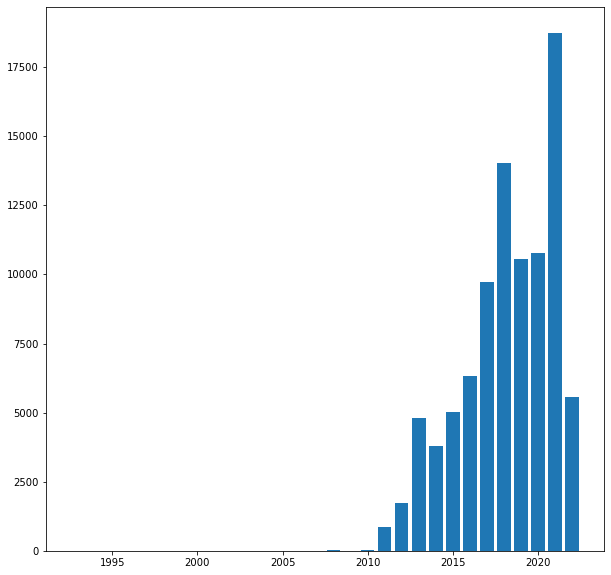

In [55]:
fig, ax = plt.subplots(figsize=(10,10))
plt.bar(electric4.loc[:, "Model Year"].value_counts().index, electric4.loc[:, "Model Year"].value_counts())
# Model Year : 자동차 모델 연도 , 2011년도 모델을 기점으로 가파르게 증가 , 2011년 이전 모델은 거의 도로에 굴러다니는게 없음
# 그 전에는 많이 생산을 못한 건지, 안 한 건지, 했었는데 못 팔은건지, 해서 많이 팔았는데 오래되서 대부분 폐차를 시킨건지는 알수없지만.. (적어도 이 데이터만으로는)

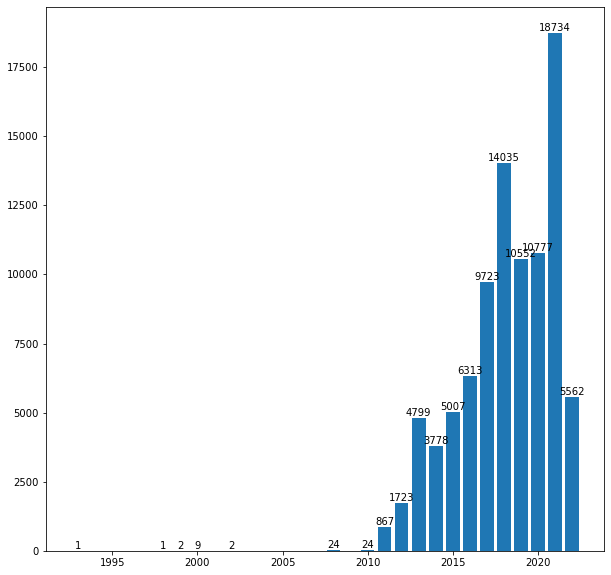

In [56]:
# 숫자도 같이 보고싶음

fig, ax = plt.subplots(figsize=(10,10))
bars = ax.bar(electric4.loc[:, "Model Year"].value_counts().index, electric4.loc[:, "Model Year"].value_counts())

ax.bar_label(bars)
plt.show()

In [57]:
# make 필드도 접목시켜보기 (제조사)

In [58]:
electric4.Make.value_counts()

TESLA                   39791
NISSAN                  12436
CHEVROLET                9492
FORD                     5535
KIA                      4327
BMW                      3847
TOYOTA                   3817
AUDI                     1830
VOLKSWAGEN               1760
CHRYSLER                 1600
HYUNDAI                  1275
VOLVO                    1033
FIAT                      792
HONDA                     764
PORSCHE                   656
JEEP                      615
MITSUBISHI                541
MINI                      441
MERCEDES-BENZ             352
SMART                     275
POLESTAR                  222
JAGUAR                    201
CADILLAC                   95
LINCOLN                    83
SUBARU                     50
RIVIAN                     37
LAND ROVER                 36
FISKER                     13
AZURE DYNAMICS              7
WHEEGO ELECTRIC CARS        3
TH!NK                       2
LUCID MOTORS                2
BENTLEY                     2
DODGE     

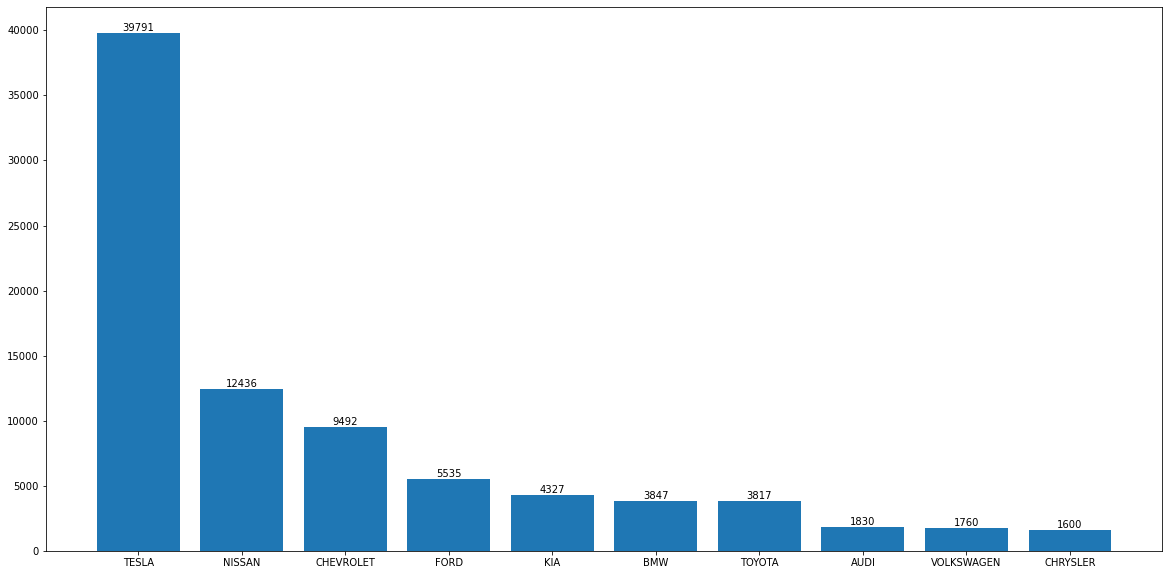

In [59]:
fig, ax = plt.subplots(figsize=(20,10))
# bars = ax.bar(electric.Make.value_counts().index, electric.Make.value_counts())
bars = ax.bar(electric4.Make.value_counts()[0:10].index, electric4.Make.value_counts()[0:10])

ax.bar_label(bars)
plt.show()

# 테슬라가 상당히 많다는것에 주목하고 싶음, 2위까지는 직전하위순위에 끽해야 2배정도지만, 1위와 2위 차이는 3배

<AxesSubplot:xlabel='count', ylabel='Make'>

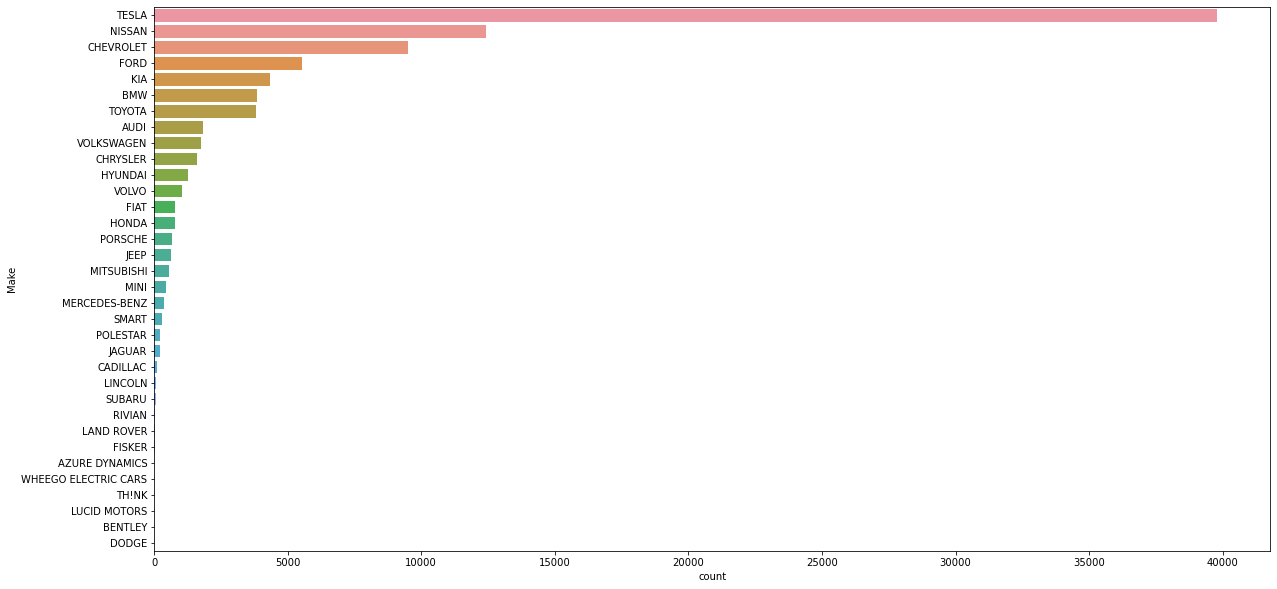

In [60]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(y="Make", data=(electric4), order=electric4.Make.value_counts().index)

<AxesSubplot:xlabel='count', ylabel='Make'>

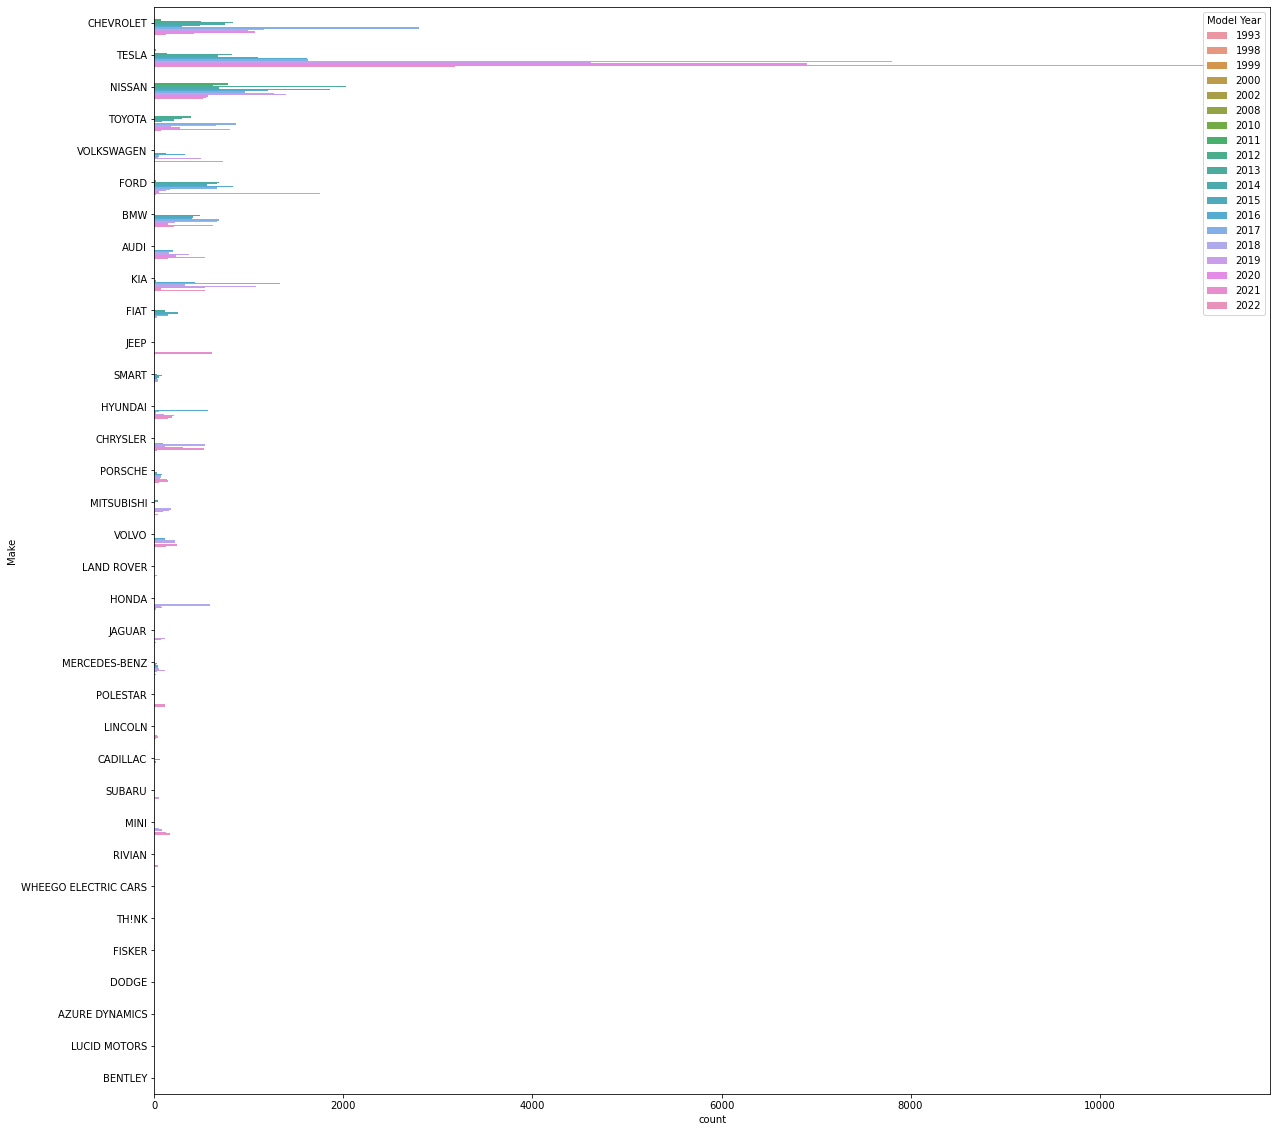

In [61]:
fig, ax = plt.subplots(figsize=(20,20))

sns.countplot(
    y = 'Make',
    data = electric4,
    hue = 'Model Year',
)

In [62]:
top_n = electric4.Make.value_counts().index[:5]
top_n

Index(['TESLA', 'NISSAN', 'CHEVROLET', 'FORD', 'KIA'], dtype='object')

In [63]:
(
    electric4.assign(Make=electric4.Make.where(electric4.Make.isin(top_n), 'Other'))
    .Make.value_counts()
)

TESLA        39791
Other        20352
NISSAN       12436
CHEVROLET     9492
FORD          5535
KIA           4327
Name: Make, dtype: int64

In [64]:
electric5 = electric4.assign(Make1=electric4.Make.where(electric4.Make.isin(top_n), 'Other'))
electric5

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Make1
0,1G1RC6E45F,Thurston,TENINO,WA,98589,2015,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,35.0,157715015,POINT (-122.842388 46.855401),PUGET SOUND ENERGY INC,CHEVROLET
1,5YJSA1E26J,Snohomish,MUKILTEO,WA,98275,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,21.0,474398907,POINT (-122.302507 47.911921),PUGET SOUND ENERGY INC,TESLA
2,5YJSA1E26K,Camden,SAINT MARYS,GA,31558,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,NaN,185220493,POINT (-81.558651 30.777128),NaN,TESLA
3,1G1FW6S03H,Thurston,LACEY,WA,98503,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,22.0,196814537,POINT (-122.80237 47.02499),PUGET SOUND ENERGY INC,CHEVROLET
4,1N4AZ0CP6D,Skagit,MOUNT VERNON,WA,98273,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,40.0,171974470,POINT (-122.355669 48.416422),PUGET SOUND ENERGY INC,NISSAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91928,5UXKT0C37H,Pierce,GIG HARBOR,WA,98332,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,26.0,131262967,POINT (-122.599454 47.36582),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,Other
91929,5YJ3E1EB6K,Snohomish,BOTHELL,WA,98012,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,1.0,477662762,POINT (-122.201515 47.843376),PUGET SOUND ENERGY INC,TESLA
91930,5YJ3E1EB2J,Snohomish,LAKE STEVENS,WA,98258,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,44.0,209736698,POINT (-122.085999 48.016305),PUGET SOUND ENERGY INC,TESLA
91931,5YJ3E1EA1K,King,FEDERAL WAY,WA,98023,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,30.0,478128010,POINT (-122.362029 47.308531),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),TESLA


In [65]:
# electric5.Make.value_counts()

In [66]:
electric5.loc[:, 'Model Year'].value_counts().index.sort_values()
# electric5.loc[:, 'Model Year'].value_counts().index.sort_values().delete([0,1,2,3,4,5,6])

Int64Index([1993, 1998, 1999, 2000, 2002, 2008, 2010, 2011, 2012, 2013, 2014,
            2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
           dtype='int64')

In [67]:
year_sort = electric5.loc[:, 'Model Year'].value_counts().index.sort_values().delete([0,1,2,3,4,5,6])

electric6 = (
    electric5.assign(Model_Year1 = electric5.loc[:, 'Model Year']
                    .where(electric5.loc[:, 'Model Year'].isin(year_sort), 10))
)

electric6

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Make1,Model_Year1
0,1G1RC6E45F,Thurston,TENINO,WA,98589,2015,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,35.0,157715015,POINT (-122.842388 46.855401),PUGET SOUND ENERGY INC,CHEVROLET,2015
1,5YJSA1E26J,Snohomish,MUKILTEO,WA,98275,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,21.0,474398907,POINT (-122.302507 47.911921),PUGET SOUND ENERGY INC,TESLA,2018
2,5YJSA1E26K,Camden,SAINT MARYS,GA,31558,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,NaN,185220493,POINT (-81.558651 30.777128),NaN,TESLA,2019
3,1G1FW6S03H,Thurston,LACEY,WA,98503,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,22.0,196814537,POINT (-122.80237 47.02499),PUGET SOUND ENERGY INC,CHEVROLET,2017
4,1N4AZ0CP6D,Skagit,MOUNT VERNON,WA,98273,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,40.0,171974470,POINT (-122.355669 48.416422),PUGET SOUND ENERGY INC,NISSAN,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91928,5UXKT0C37H,Pierce,GIG HARBOR,WA,98332,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,26.0,131262967,POINT (-122.599454 47.36582),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,Other,2017
91929,5YJ3E1EB6K,Snohomish,BOTHELL,WA,98012,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,1.0,477662762,POINT (-122.201515 47.843376),PUGET SOUND ENERGY INC,TESLA,2019
91930,5YJ3E1EB2J,Snohomish,LAKE STEVENS,WA,98258,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,44.0,209736698,POINT (-122.085999 48.016305),PUGET SOUND ENERGY INC,TESLA,2018
91931,5YJ3E1EA1K,King,FEDERAL WAY,WA,98023,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,30.0,478128010,POINT (-122.362029 47.308531),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),TESLA,2019


In [68]:
# electric6.Make1.value_counts()
electric6.Model_Year1.value_counts().index.astype(str).sort_values()

Index(['10', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018',
       '2019', '2020', '2021', '2022'],
      dtype='object')

<AxesSubplot:xlabel='Make1', ylabel='count'>

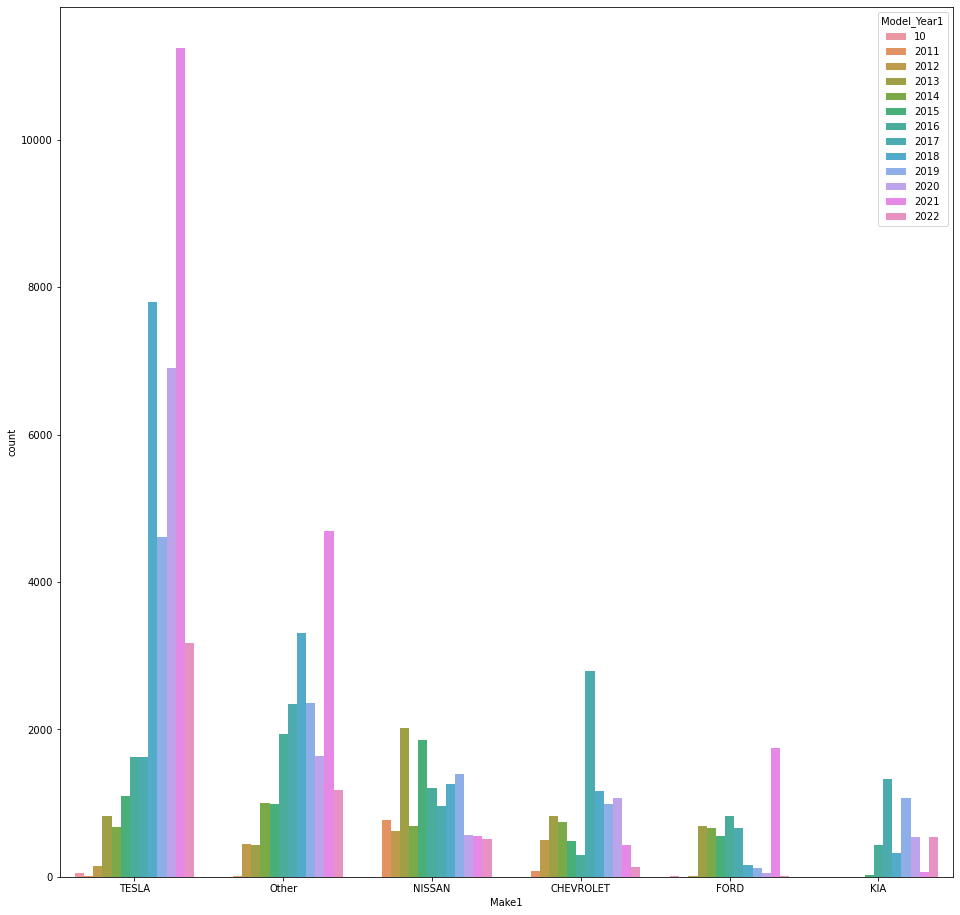

In [69]:
fig, ax = plt.subplots(figsize=(16,16))

sns.countplot(
    x = 'Make1',
    data = electric6,
    # hue = 'Model Year',
    hue = electric6.Model_Year1,
    hue_order = electric6.Model_Year1.value_counts().index.sort_values(),
    order = electric6.Make1.value_counts().index
)

In [70]:
# 왜인지 hue_order는 인덱스를 str로 하면 이상해져서 11년도 이전을 일단 10으로표기

# 테슬라가 최근에 4~5년사이에 엄청 치고 올라온 브랜드인 것을 알수 있음
# 18년 이후 모델 수량은 1위에서 떨어진적이 없음, 비교대상인 2위는 하위 29개의 브랜드 통합인 것도 괄목할만함 (테슬라 vs 하위 29개 제조사 임)
# 니산은 11년, 12년 ~~ 모델 이 많다가(당시에는 1위였는데) 최신모델로 갈수록 밀려나는중

In [71]:
electric6.Model_Year1.value_counts()

2021    18734
2018    14035
2020    10777
2019    10552
2017     9723
2016     6313
2022     5562
2015     5007
2013     4799
2014     3778
2012     1723
2011      867
10         63
Name: Model_Year1, dtype: int64

In [72]:
electric4.Make.describe()

count     91933
unique       34
top       TESLA
freq      39791
Name: Make, dtype: object

In [73]:
electric4.loc[:, 'Electric Vehicle Type'].value_counts()

Battery Electric Vehicle (BEV)            68297
Plug-in Hybrid Electric Vehicle (PHEV)    23636
Name: Electric Vehicle Type, dtype: int64

In [74]:
###### 여기 아래부터는 아직 마무리 안된 진행중인 작업 입니다 ( 정리는 다시 할 계획 입니다 ) ######

In [75]:
# Battery Electric Vehicle (BEV) : 100% 전기차. 차량 내부에 내연기관(왕복엔진)이 없음
# Plug-in Hybrid Electric Vehicle (PHEV) : 전기 + 기름. 차량 내부에 내연기관(왕복엔진)이 있음

In [76]:
electric4.loc[:, 'Electric Vehicle Type'].isnull().sum()

0

In [77]:
# electric4.loc[:, 'Electric Range'].sort_values()
electric4.loc[:, 'Electric Range']

0         38
1        249
2        270
3        238
4         75
        ... 
91928     14
91929    220
91930    215
91931    220
91932     53
Name: Electric Range, Length: 91933, dtype: int64

In [78]:
electric4.index

RangeIndex(start=0, stop=91933, step=1)

In [79]:
electric4.loc[:, 'Electric Range'].isnull().sum()

0

In [80]:
electric4.loc[:, 'Electric Range'].sort_values()

21230      0
64371      0
23729      0
64375      0
23725      0
        ... 
20701    337
81227    337
80566    337
18284    337
51161    337
Name: Electric Range, Length: 91933, dtype: int64

<BarContainer object of 91933 artists>

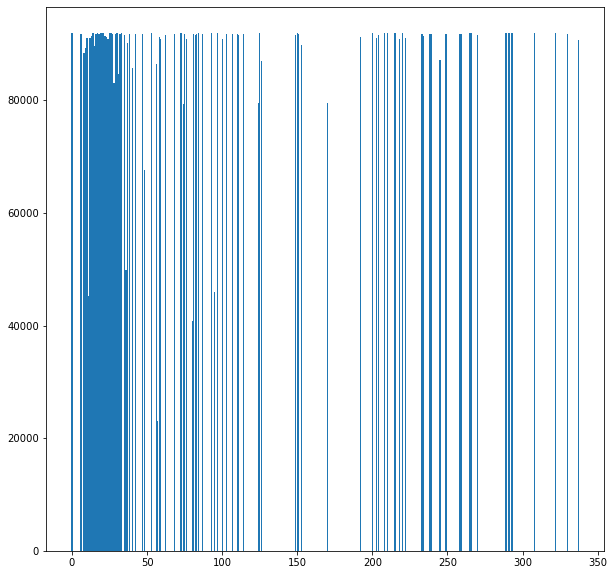

In [81]:
fig, ax = plt.subplots(figsize=(10,10))
plt.bar(electric4.loc[:, 'Electric Range'], electric.index)

In [82]:
# ?????

<AxesSubplot:ylabel='Frequency'>

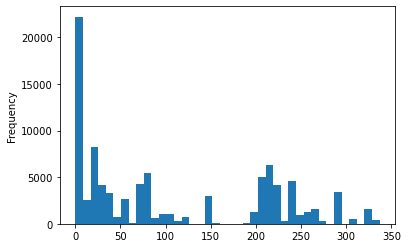

In [83]:
#히스토그램
electric4.loc[:, 'Electric Range'].plot.hist(bins=40)

In [84]:
electric4.loc[:, 'Electric Range'].describe()

count    91933.000000
mean       106.913774
std        104.047660
min          0.000000
25%         14.000000
50%         73.000000
75%        215.000000
max        337.000000
Name: Electric Range, dtype: float64

In [85]:
# electric4

<AxesSubplot:>

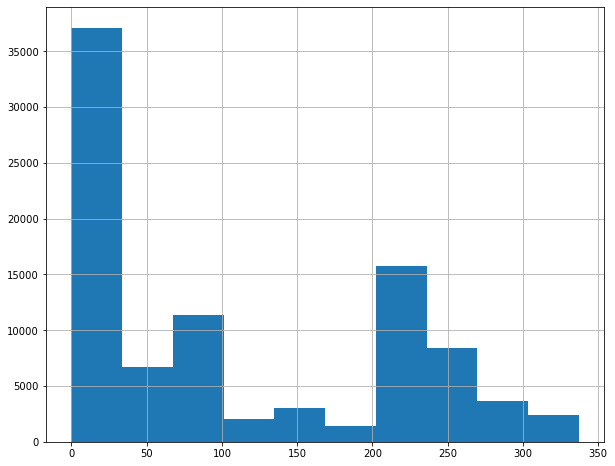

In [86]:
fig, ax = plt.subplots(figsize=(10, 8))
electric4.loc[:, 'Electric Range'].hist(ax=ax)

<AxesSubplot:>

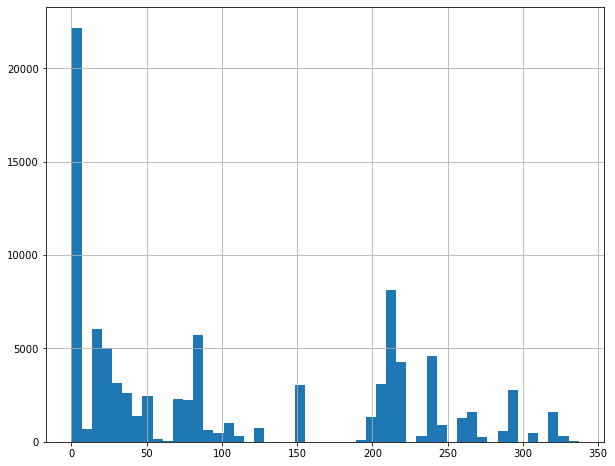

In [87]:
fig, ax = plt.subplots(figsize=(10, 8))
electric4.loc[:, 'Electric Range'].hist(ax=ax, bins=50)

<AxesSubplot:xlabel='Electric Range', ylabel='Count'>

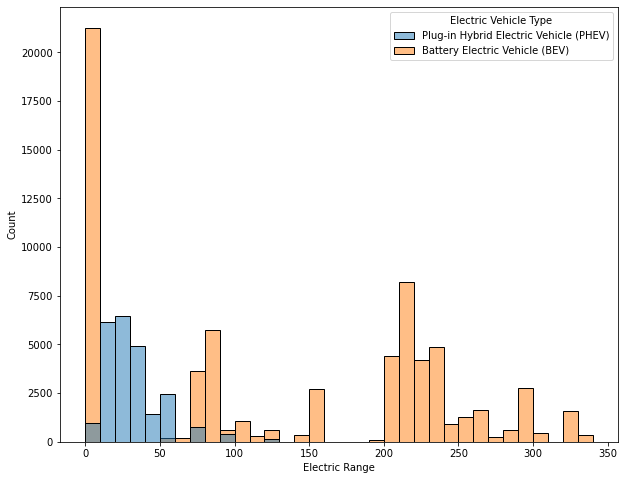

In [88]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(data=electric4, 
             x=electric4.loc[:, 'Electric Range'], 
             # y=electric4.loc[:, 'Electric Vehicle Type'], 
             hue=electric4.loc[:, 'Electric Vehicle Type'],
             # hue=electric4.loc[:, 'Electric Range'], 
             ax=ax,
             binwidth=10
            )

In [89]:
pd.DataFrame(electric4.loc[:, 'Electric Range'].value_counts().sort_values())

,Electric Range
59,1
80,1
57,1
74,2
95,2
...,...
238,3572
220,4061
84,4077
215,6264


In [90]:
electric4.loc[:, 'Electric Range']

0         38
1        249
2        270
3        238
4         75
        ... 
91928     14
91929    220
91930    215
91931    220
91932     53
Name: Electric Range, Length: 91933, dtype: int64

In [91]:
electric4.loc[:, 'Electric Range'].isnull().sum()

0

In [92]:
# electric

In [93]:
a = electric4.loc[:, 'Electric Range'] == 0

In [94]:
a

0        False
1        False
2        False
3        False
4        False
         ...  
91928    False
91929    False
91930    False
91931    False
91932    False
Name: Electric Range, Length: 91933, dtype: bool

Electric Range is no longer maintained for Battery Electric Vehicles (BEV) because new BEVs have an electric range of 30 miles or more. Zero (0) will be entered where the electric range has not been researched.

In [95]:
is_zero = electric.loc[:, 'Electric Range'] == 0
is_zero2 = electric.loc[:, 'Electric Range'].equals(0)
is_zero2

False

In [96]:
electric4.assign(Electric_Range1 = electric.loc[:, 'Electric Range'].equals(0))

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,Electric_Range1
0,1G1RC6E45F,Thurston,TENINO,WA,98589,2015,CHEVROLET,VOLT,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,38,0,35.0,157715015,POINT (-122.842388 46.855401),PUGET SOUND ENERGY INC,False
1,5YJSA1E26J,Snohomish,MUKILTEO,WA,98275,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,21.0,474398907,POINT (-122.302507 47.911921),PUGET SOUND ENERGY INC,False
2,5YJSA1E26K,Camden,SAINT MARYS,GA,31558,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,NaN,185220493,POINT (-81.558651 30.777128),NaN,False
3,1G1FW6S03H,Thurston,LACEY,WA,98503,2017,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,22.0,196814537,POINT (-122.80237 47.02499),PUGET SOUND ENERGY INC,False
4,1N4AZ0CP6D,Skagit,MOUNT VERNON,WA,98273,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,40.0,171974470,POINT (-122.355669 48.416422),PUGET SOUND ENERGY INC,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91928,5UXKT0C37H,Pierce,GIG HARBOR,WA,98332,2017,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,26.0,131262967,POINT (-122.599454 47.36582),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,False
91929,5YJ3E1EB6K,Snohomish,BOTHELL,WA,98012,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,1.0,477662762,POINT (-122.201515 47.843376),PUGET SOUND ENERGY INC,False
91930,5YJ3E1EB2J,Snohomish,LAKE STEVENS,WA,98258,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,44.0,209736698,POINT (-122.085999 48.016305),PUGET SOUND ENERGY INC,False
91931,5YJ3E1EA1K,King,FEDERAL WAY,WA,98023,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,30.0,478128010,POINT (-122.362029 47.308531),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),False


In [97]:
# year_sort = electric5.loc[:, 'Model Year'].value_counts().index.sort_values().delete([0,1,2,3,4,5,6])

# electric6 = (
#     electric5.assign(Model_Year1 = electric5.loc[:, 'Model Year']
#                     .where(electric5.loc[:, 'Model Year'].isin(year_sort), 10))
# )

# electric6

In [98]:
electric.loc[:, 'Electric Range'].nunique()

99

In [99]:
# np.finfo(np.float16)

In [100]:
# electric.dtypes.value_counts()

In [101]:
# data_dictionary.csv 만들어볼까